In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
%matplotlib inline

In [8]:
# Step 1: Load Data
data = pd.read_csv('browsing_data.csv')

In [9]:
# Step 2: Data Cleaning
# Remove unnecessary columns
data = data[['url', 'title', 'time']]

In [10]:
# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

In [11]:
# Step 3: EDA
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19340 entries, 0 to 19339
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   url     19340 non-null  object        
 1   title   19236 non-null  object        
 2   time    19340 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 453.4+ KB
None
                                                 url  \
0  https://chrome.google.com/webstore/detail/expo...   
1  https://chrome.google.com/webstore/detail/expo...   
2  https://chrome.google.com/webstore/detail/expo...   
3  https://www.google.com/search?q=export+history...   
4  https://chrome.google.com/webstore/detail/expo...   

                                      title                time  
0  Export Chrome History - Chrome Web Store 2023-08-17 15:47:49  
1  Export Chrome History - Chrome Web Store 2023-08-17 15:47:41  
2  Export Chrome History - Chrome Web Store 2023-08-17 15:47:06  
3  ex

In [25]:
# Replace each url to the corresponding hostname using Pandas apply() function

urls = data['url'].apply(lambda x: urlparse(x).netloc)

In [26]:
# Prints unique values i.e. unique websites you have visited so far

uniques = urls.unique()
len(uniques)

881

In [27]:
import collections

# frequencies
frequencies = collections.Counter(urls)

# Sort the urls with frequencies as a key
websites = sorted(frequencies, key=frequencies.get, reverse=True)

# Sort the Visits count
visits = sorted(frequencies.values(), reverse=True)

# Print result
for i,j in zip(websites, visits):
    print('{} - {}'.format(i, j))

www.google.com - 3231
www.youtube.com - 2471
www.freecodecamp.org - 1258
www.kaggle.com - 1061
jovian.com - 696
en.wikipedia.org - 666
www.coursera.org - 528
lite.duckduckgo.com - 499
colab.research.google.com - 442
github.com - 433
chat.openai.com - 335
docs.google.com - 320
www.codecademy.com - 293
mail.google.com - 224
localhost:8888 - 222
drive.google.com - 196
accounts.google.com - 180
www.reddit.com - 162
www.udemy.com - 160
jovian.ml - 157
teams.microsoft.com - 154
www.linkedin.com - 148
www.techinterviewhandbook.org - 127
www.w3schools.com - 127
duckduckgo.com - 119
www.gutenberg.org - 116
keep.google.com - 97
hub.jovian.com - 94
www.msftconnecttest.com - 91
www.goodreads.com - 91
marvel.fandom.com - 90
 - 81
nac.nitk.ac.in:8090 - 76
www.classcentral.com - 73
open.spotify.com - 69
www.jango.com - 61
localhost:5600 - 60
www.imdb.com - 58
www.amazon.in - 57
printster.in - 56
alternativeto.net - 49
medium.com - 46
www.azlyrics.com - 45
www.sql-easy.com - 44
www.bing.com - 43
myacc

In [31]:
# Step 5: Analysis and Visualization
# Most visited websites
top_websites = data['domain'].value_counts().head(10)
print(top_websites)

www.google.com               3231
www.youtube.com              2471
www.freecodecamp.org         1258
www.kaggle.com               1061
jovian.com                    703
en.wikipedia.org              666
www.coursera.org              528
lite.duckduckgo.com           499
colab.research.google.com     442
github.com                    433
Name: domain, dtype: int64


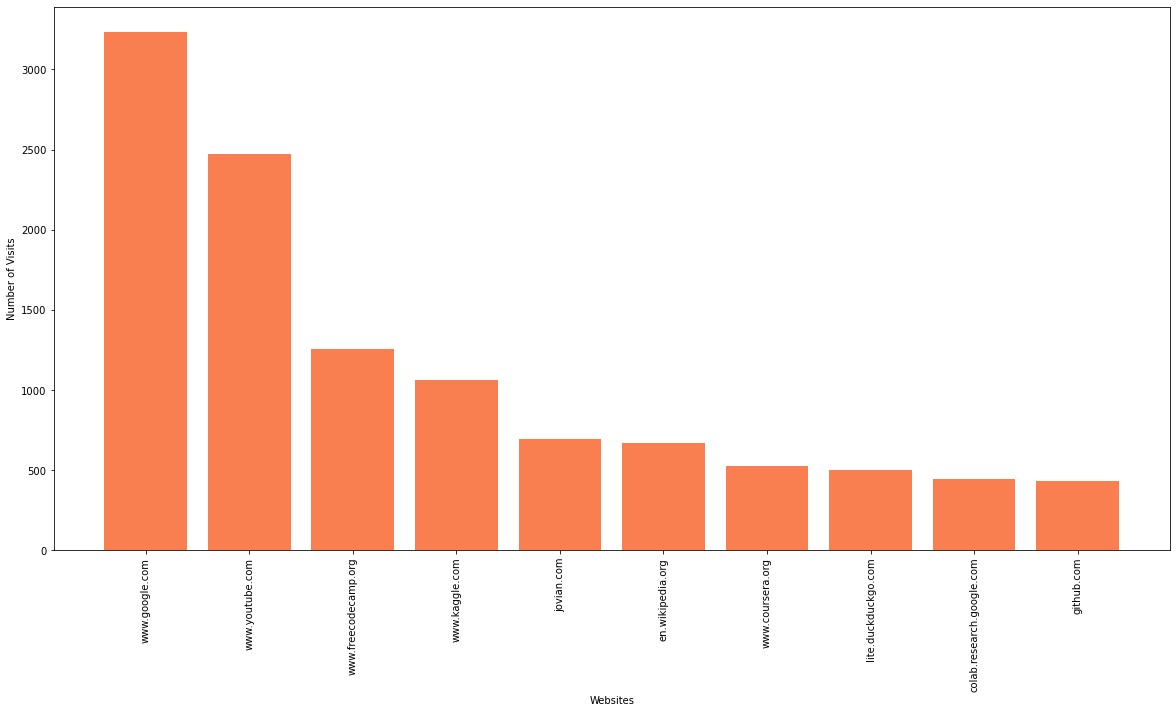

In [36]:
plt.figure(figsize=(20,10))
plt.bar(websites[:10],visits[:10], color="#F97F51")
plt.xticks(rotation='vertical')
plt.xlabel('Websites')
plt.ylabel('Number of Visits')
plt.show()